In [ ]:
!pip install seaborn bokeh

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

# 设置单元格所有行全部输出模式
from IPython.core.interactiveshell import InteractiveShell

# 设置InteractiveShell对象的ast_node_interactivity的值为all，即表示每一个单元格所有有输出的代码行全部需要输出
InteractiveShell.ast_node_interactivity = 'all'

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
%matplotlib inline

In [2]:
x = np.random.normal(size=100)

/tmp/ipykernel_12015/737711514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist=False, rug=True) # 设置hist=False，绘制核密度图，有单独的sns.kdeplot()函数


<Axes: ylabel='Density'>

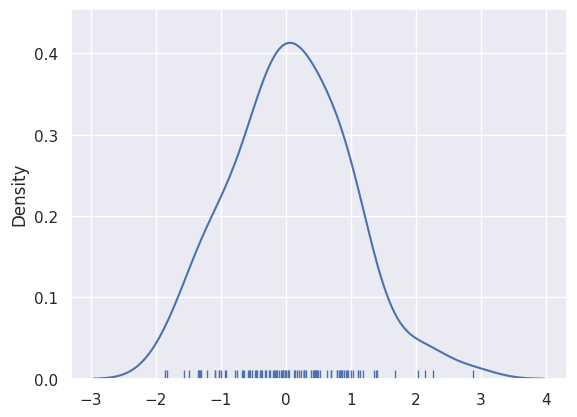

In [3]:
sns.distplot(x, hist=False, rug=True) # 设置hist=False，绘制核密度图，有单独的sns.kdeplot()函数

### 核密度图的绘制过程

第一步：首先用以该值为中心的正态（高斯）曲线替换每个观测值;

<Axes: >

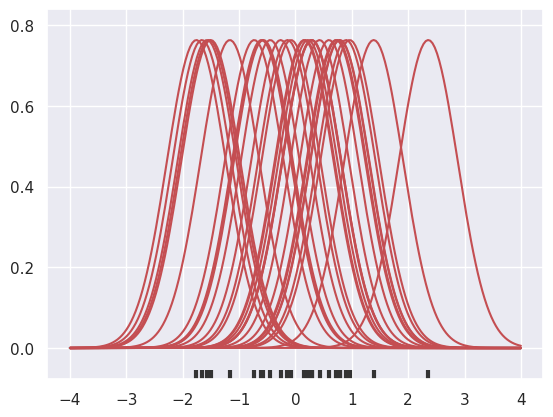

In [4]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3)

第二步：这些曲线相加，计算出支撑网格中每个点的密度值。然后将得到的曲线归一化，使其下的面积等于1；

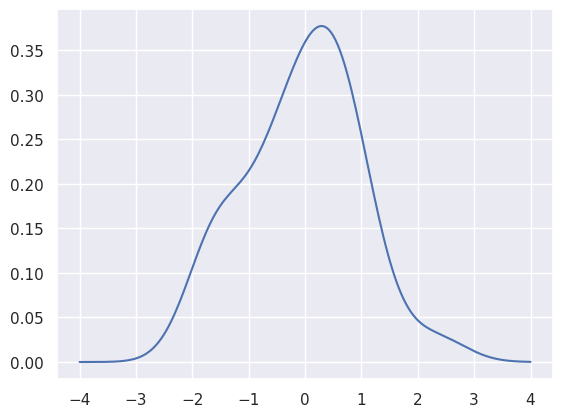

In [5]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density)